<a href="https://colab.research.google.com/github/josephdamilare01/Lets-boost-House-price-prediction-in-Norwich-Paper/blob/main/Parkinsons_Disease_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/parkinsons_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [ ]:
df.drop(["PatientID","DoctorInCharge"],inplace=True, axis=1)
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,...,29.181289,1.572427,1,0,0,0,0,0,0,0
1,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,...,12.332639,4.787551,0,1,0,1,0,1,0,1
2,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,...,29.927783,2.130686,1,0,0,0,1,0,1,1
3,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,...,21.304268,3.391288,1,1,1,0,0,0,1,1
4,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,...,8.336364,3.200969,0,0,0,1,0,1,0,0


In [ ]:
#Checking for missing values
df.isnull().sum()

,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0
SleepQuality,0


In [ ]:
#Checking the data types for each column
df.dtypes

,0
Age,int64
Gender,int64
Ethnicity,int64
EducationLevel,int64
BMI,float64
Smoking,int64
AlcoholConsumption,float64
PhysicalActivity,float64
DietQuality,float64
SleepQuality,float64


In [ ]:
# Separate columns by dtype
continous_variables = ['BMI','AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality'
,'CholesterolTotal','CholesterolTriglycerides','CholesterolHDL','CholesterolLDL','FunctionalAssessment',
                       'MoCA','UPDRS','Age','SystolicBP','DiastolicBP']

In [ ]:
continous_variables = df[continous_variables]

In [ ]:
#Summary statistics for the continous variables
continous_variables.describe()

,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,CholesterolTotal,CholesterolTriglycerides,CholesterolHDL,CholesterolLDL,FunctionalAssessment,MoCA,UPDRS,Age,SystolicBP,DiastolicBP
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,27.209493,10.040413,5.016674,4.912901,6.996639,226.860840,222.940500,59.670352,126.147858,4.989694,15.094314,101.415318,69.601900,133.719715,90.249881
std,7.208099,5.687014,2.890919,2.872115,1.753065,43.589406,101.895822,23.370920,43.407036,2.933877,8.643014,56.591448,11.594511,26.502355,17.061488
min,15.008333,0.002228,0.004157,0.000011,4.000497,150.062698,50.113604,20.027981,50.022828,0.001505,0.021191,0.028441,50.000000,90.000000,60.000000
25%,20.782176,5.150278,2.455703,2.478503,5.488864,189.385178,132.520174,39.538643,88.841960,2.415890,7.517160,53.048148,60.000000,110.000000,75.000000
50%,27.184571,10.070337,5.031550,4.825187,6.929819,228.528256,222.802452,59.343357,126.884570,4.983227,14.963574,102.561023,70.000000,133.000000,91.000000
75%,33.462452,14.829565,7.512795,7.381487,8.558719,264.608100,311.699109,79.366628,163.912782,7.484220,22.608362,149.831682,80.000000,157.000000,105.000000
max,39.999887,19.988866,9.995255,9.995864,9.999821,299.963074,399.975022,99.982265,199.985981,9.992697,29.970107,198.953604,89.000000,179.000000,119.000000


In [ ]:
continous_variables.head()

,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,CholesterolTotal,CholesterolTriglycerides,CholesterolHDL,CholesterolLDL,FunctionalAssessment,MoCA,UPDRS,Age,SystolicBP,DiastolicBP
0,19.619878,5.108241,1.380660,3.893969,9.283194,222.842278,337.307114,37.867776,148.125623,1.572427,29.181289,6.458713,85,129,60
1,16.247339,6.027648,8.409804,8.513428,5.602470,210.501133,264.635521,77.228117,153.756463,4.787551,12.332639,37.306703,75,163,76
2,15.368239,2.242135,0.213275,6.498805,9.929824,287.387996,395.662649,85.588304,118.702600,2.130686,29.927783,67.838170,70,113,93
3,15.454557,5.997788,1.375045,6.715033,4.196189,280.339546,362.189688,51.869626,136.299186,3.391288,21.304268,52.964696,52,146,78
4,18.616042,9.775243,1.188607,4.657572,9.363925,284.014151,149.956586,25.069418,108.449452,3.200969,8.336364,21.804880,87,115,94


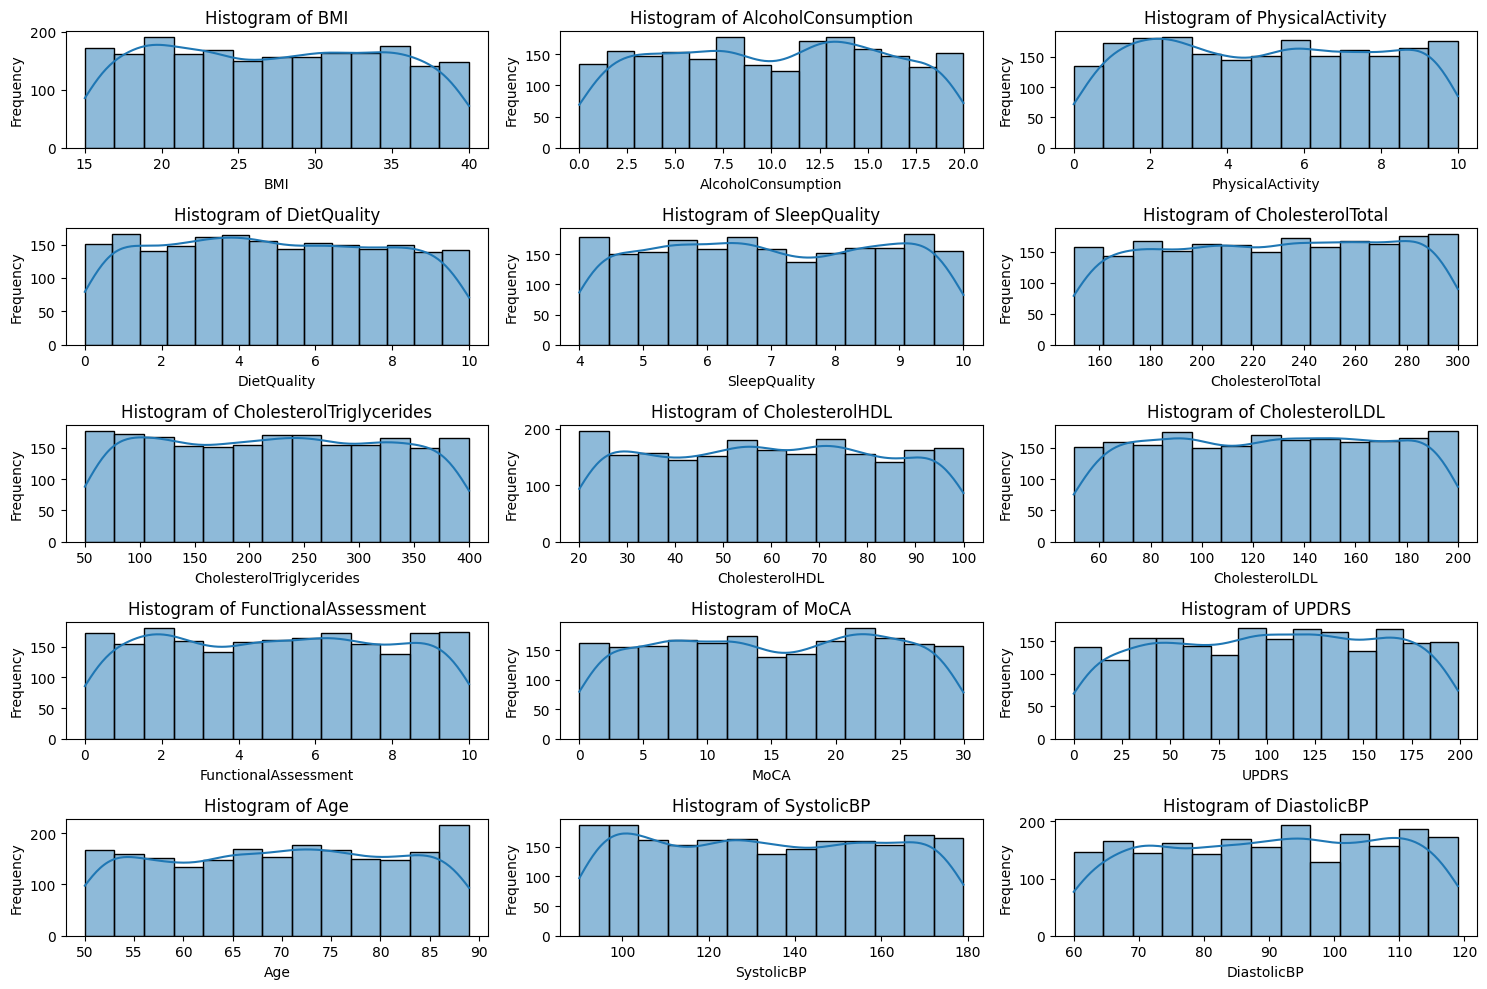

In [ ]:
#Checking the variables distribution
plt.figure(figsize=(15, 10))
for i, column in enumerate(continous_variables.columns[:15], 1):
    plt.subplot(5, 3, i)
    sns.histplot(continous_variables[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
categorical_variables = ['Gender','Smoking','EducationLevel','Ethnicity',
                         'Rigidity','Diabetes','Depression','Stroke','Constipation',
                         'SleepDisorders','SpeechProblems','Bradykinesia',
                         'Diagnosis','Tremor','PosturalInstability','Hypertension',
                         'TraumaticBrainInjury','FamilyHistoryParkinsons']

In [ ]:
categorical_variables = df[categorical_variables]

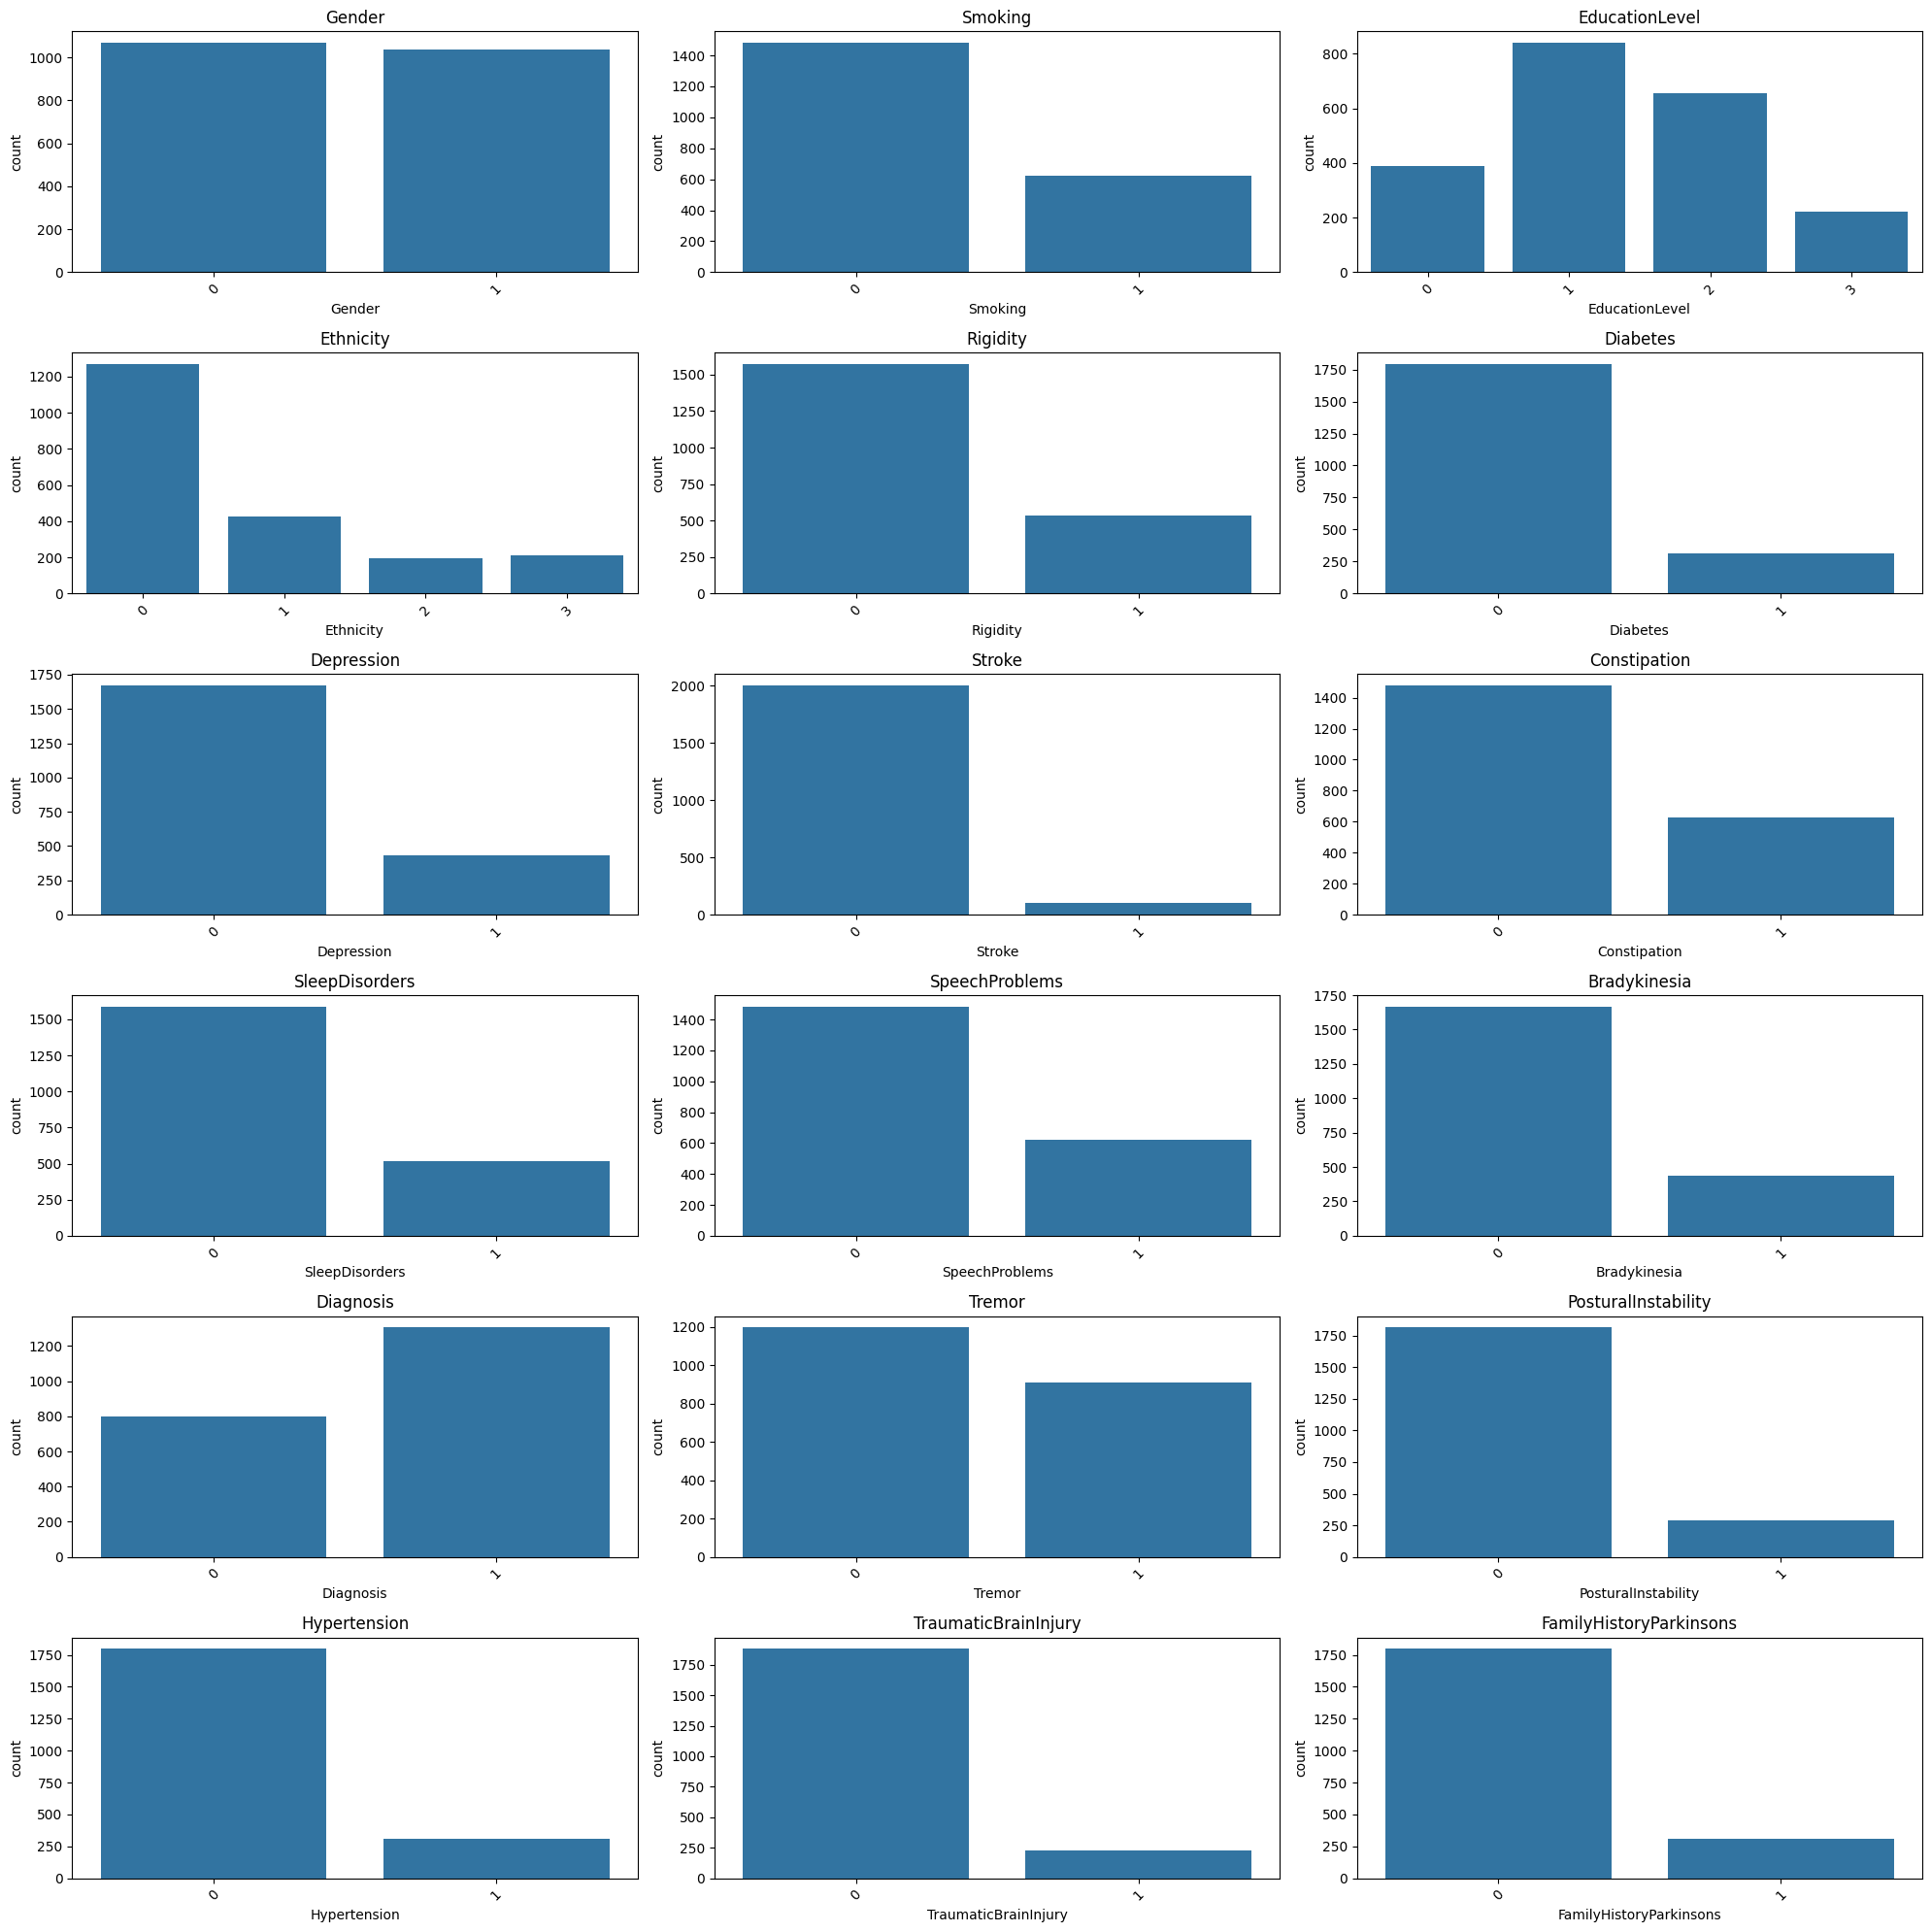

In [ ]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(categorical_variables.columns[:18], 1):
    plt.subplot(6, 3, i)
    sns.countplot(x=categorical_variables[column])
    plt.title(f'{column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

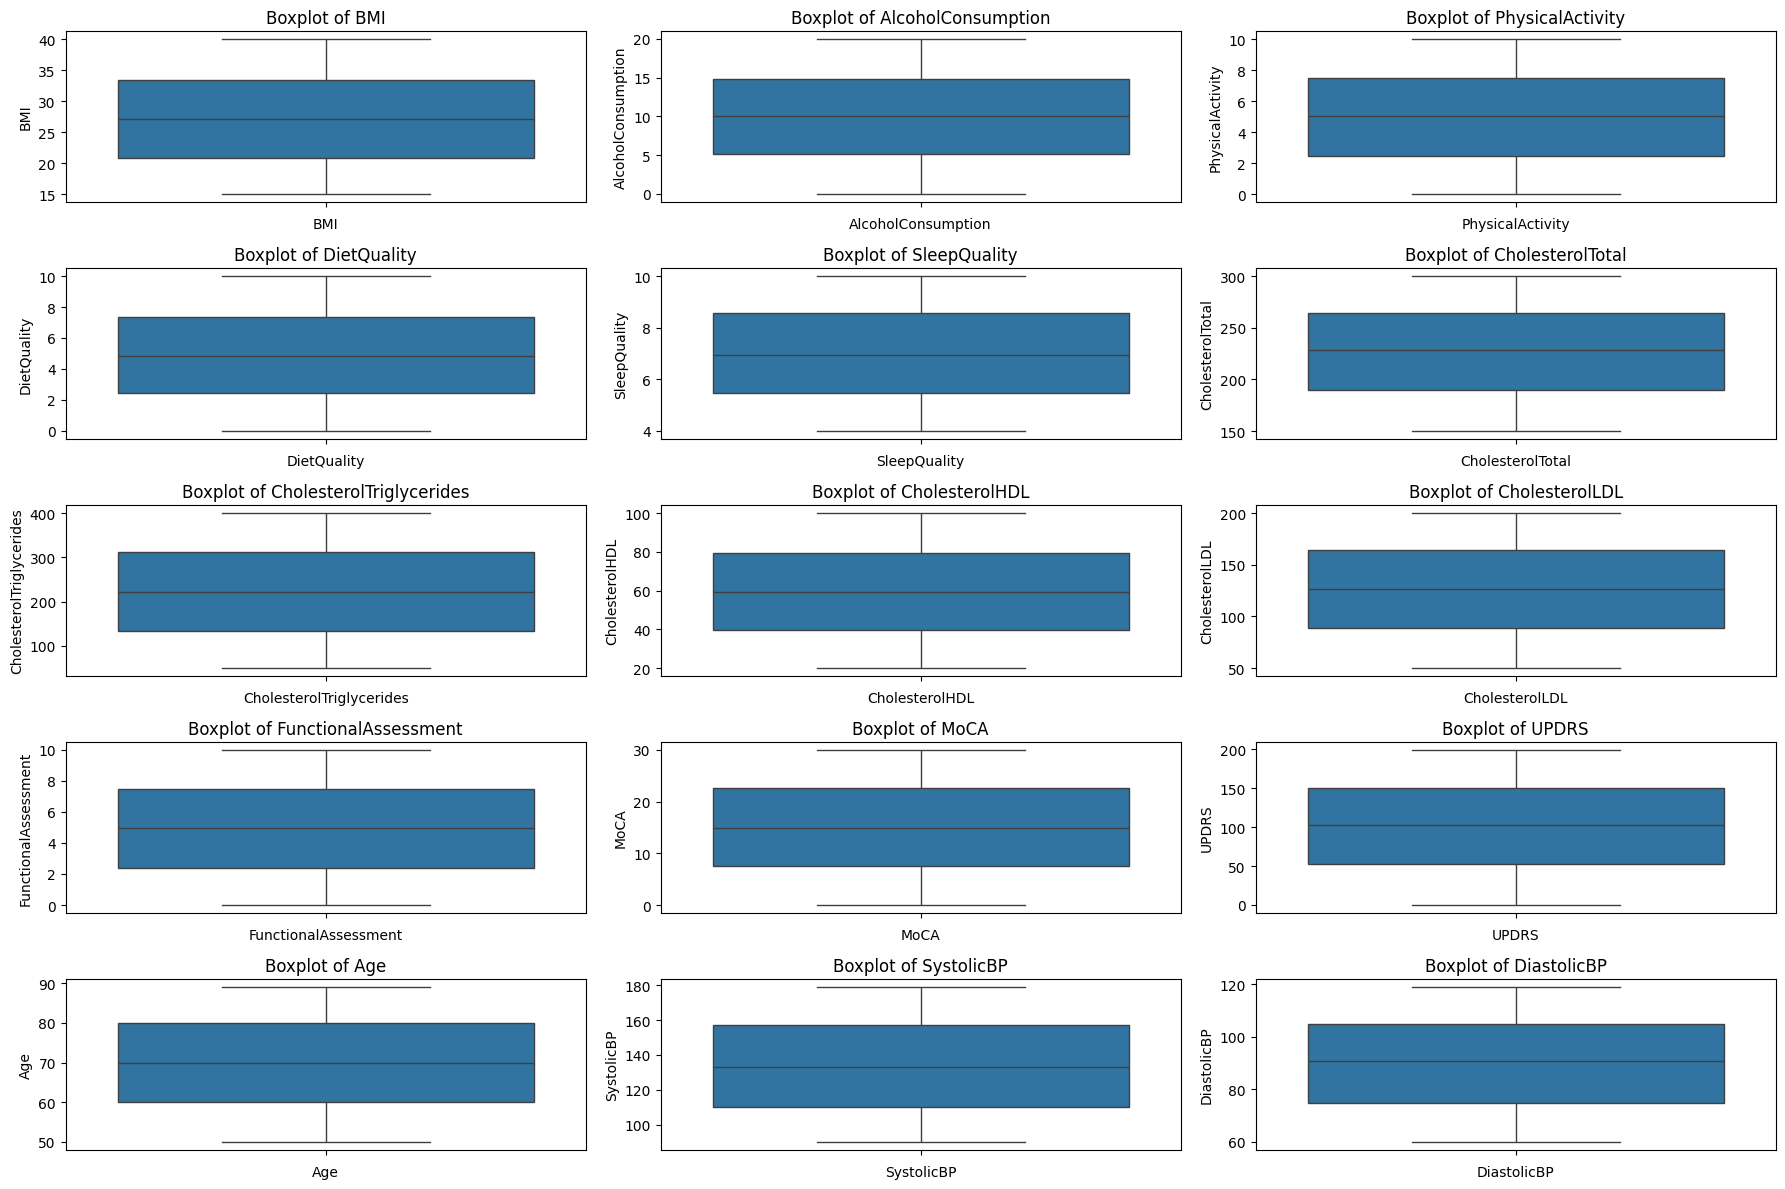

In [ ]:
#Checking for outliers
plt.figure(figsize=(18, 12))
for i, column in enumerate(continous_variables.columns[:15], 1):  # Adjust as needed
    plt.subplot(5, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


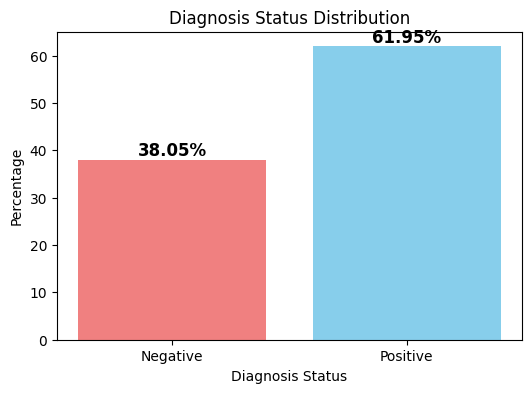

In [ ]:
# Count occurrences of each category as percentages
counts = df['Diagnosis'].value_counts(normalize=True) * 100
# Create bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(counts.index, counts.values, color=['skyblue', 'lightcoral'])
# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%',
             ha='center', va='bottom', fontsize=12, fontweight='bold')
# Set labels and title
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title('Diagnosis Status Distribution')
plt.xlabel('Diagnosis Status')
plt.ylabel('Percentage')
# Show plot
plt.show()

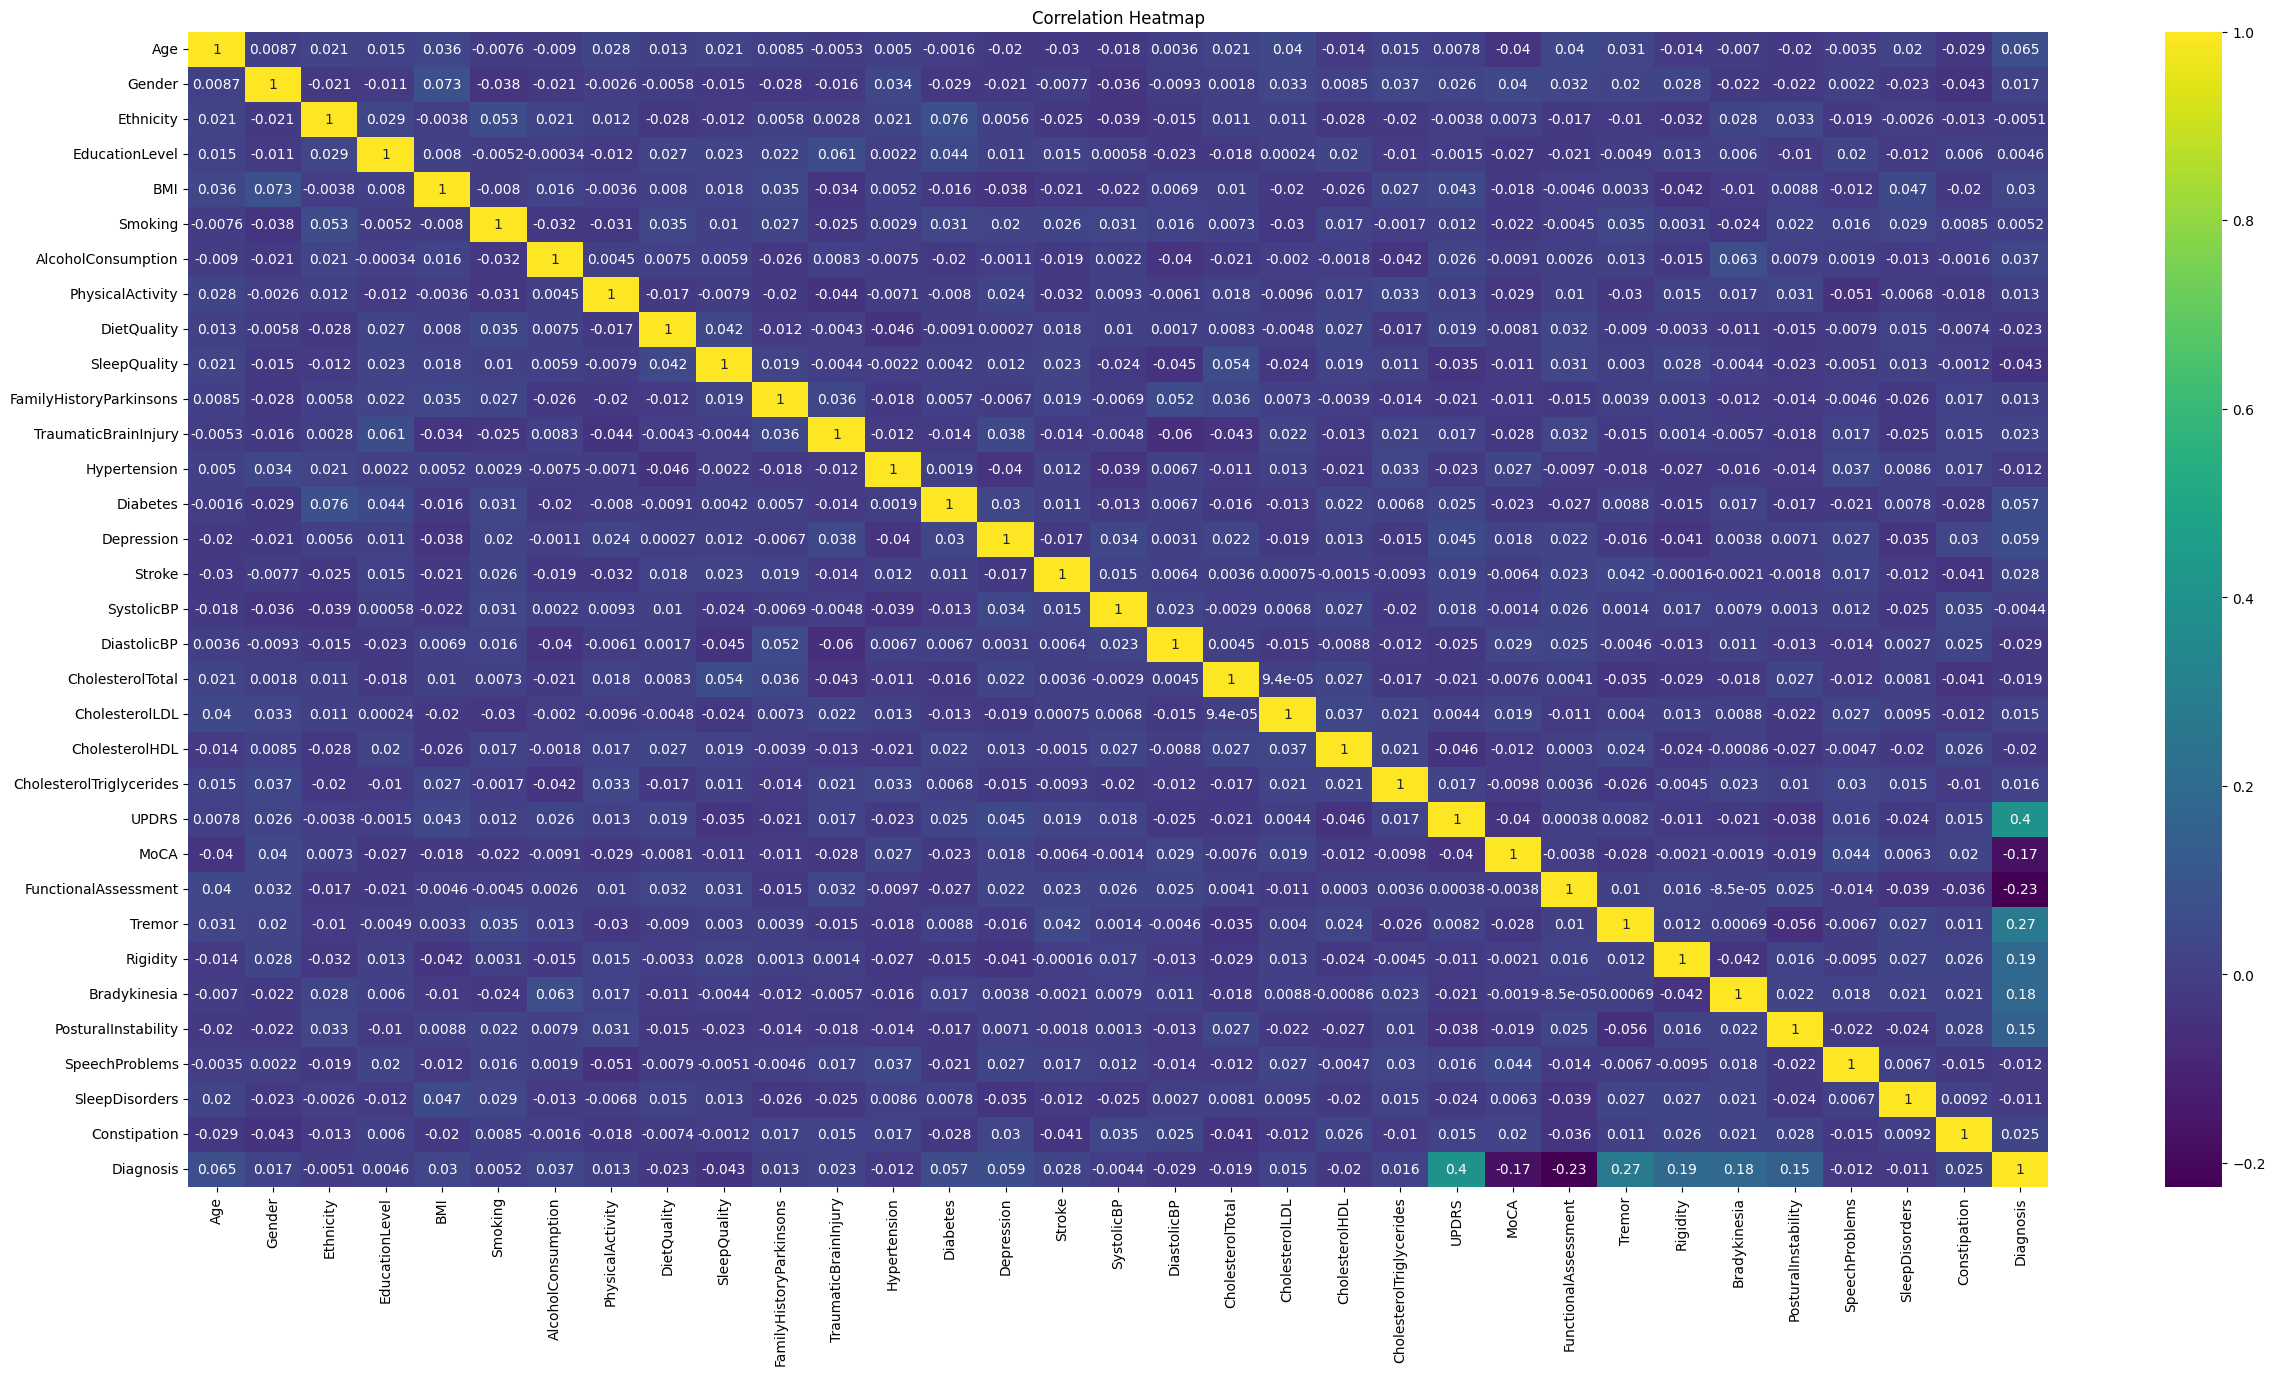

In [ ]:
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_resampled.shape

(2608, 32)

In [ ]:
y_resampled.shape

(2608,)

Text(0, 0.5, 'Count')

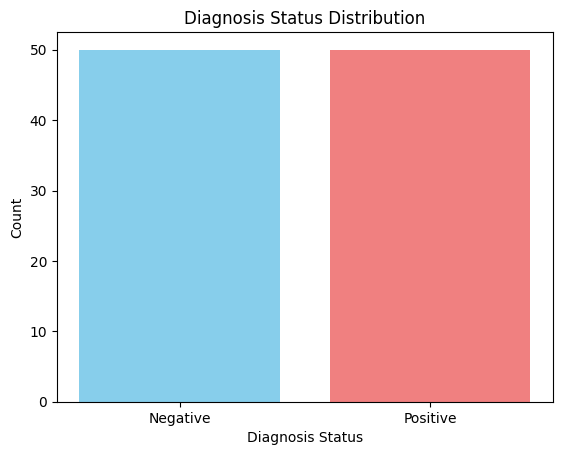

In [ ]:
#Checking the distribution of the cleaned target variable
# Count occurrences of each category
counts = y_resampled.value_counts(normalize=True) * 100
# Create bar plot
plt.bar(counts.index, counts.values, color=['skyblue', 'lightcoral'])
plt.xticks([0, 1], ['Negative', 'Positive'])
# Add titles and labels
plt.title('Diagnosis Status Distribution')
plt.xlabel('Diagnosis Status')
plt.ylabel('Count')

The Data is now balanced

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42,stratify=y_resampled)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler as fitted on training data

Top 10 Selected Features: Index(['Diabetes', 'SleepDisorders', 'Depression', 'CholesterolTotal',
       'DiastolicBP', 'FamilyHistoryParkinsons', 'Bradykinesia',
       'SpeechProblems', 'FunctionalAssessment', 'MoCA'],
      dtype='object')


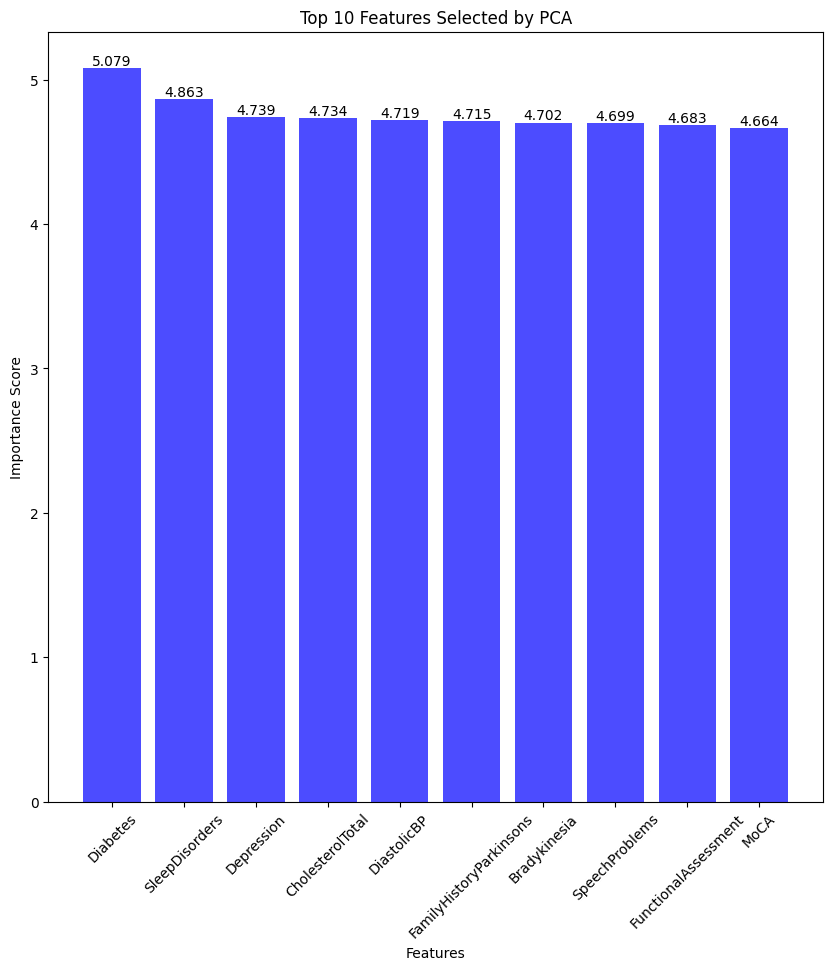

In [ ]:

# Apply PCA with a valid number of components
pca = PCA(n_components=min(X_train_scaled.shape))
X_train_pca = pca.fit_transform(X_train_scaled)

# Get PCA loadings (absolute values of component coefficients)
loadings = np.abs(pca.components_)

# Sum of absolute loadings for each feature across all components
feature_importance = np.sum(loadings, axis=0)

# Rank features by importance
feature_ranking = np.argsort(feature_importance)[::-1]

# Select top 10 most important features
top_10_features = df.columns[feature_ranking[:10]]
print("Top 10 Selected Features:", top_10_features)
top_10_scores = feature_importance[feature_ranking[:10]]

# Plot feature importance with scores
plt.figure(figsize=(10, 10))
bars = plt.bar(top_10_features, top_10_scores, color='blue', alpha=0.7)

# Add labels on top of bars
for bar, score in zip(bars, top_10_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{score:.3f}', ha='center', va='bottom', fontsize=10)

plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Top 10 Features Selected by PCA")
plt.xticks(rotation=45)
plt.show()

# Use only top 10 features for training
X_train_selected = X_train[top_10_features]
X_test_selected = X_test[top_10_features]

In [ ]:
!pip install scikeras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_selected.shape[1],)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(128, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model1.compile(optimizer=Adam(learning_rate=0.01),
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Fit the model
history = model1.fit(X_train_selected, y_train,
                     epochs= 100, batch_size=128,
                     validation_data=(X_test_selected, y_test))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.4861 - loss: 9.5682 - val_accuracy: 0.5000 - val_loss: 0.7486
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5511 - loss: 0.6968 - val_accuracy: 0.5000 - val_loss: 0.7136
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5225 - loss: 0.6982 - val_accuracy: 0.5364 - val_loss: 0.6837
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5459 - loss: 0.6869 - val_accuracy: 0.5651 - val_loss: 0.6763
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5719 - loss: 0.6769 - val_accuracy: 0.5805 - val_loss: 0.6678
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5904 - loss: 0.6694 - val_accuracy: 0.5421 - val_loss: 0.7166
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6068 - loss: 0.6674 - val_accuracy: 0.6188 - val_loss: 0.6504
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6266 - loss: 0.6530 - val_accuracy: 0.6686 - val_loss: 0.

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model1.evaluate(X_test_selected, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5127 - loss: 0.6931 
Test Loss: 0.6932
Test Accuracy: 50.00%


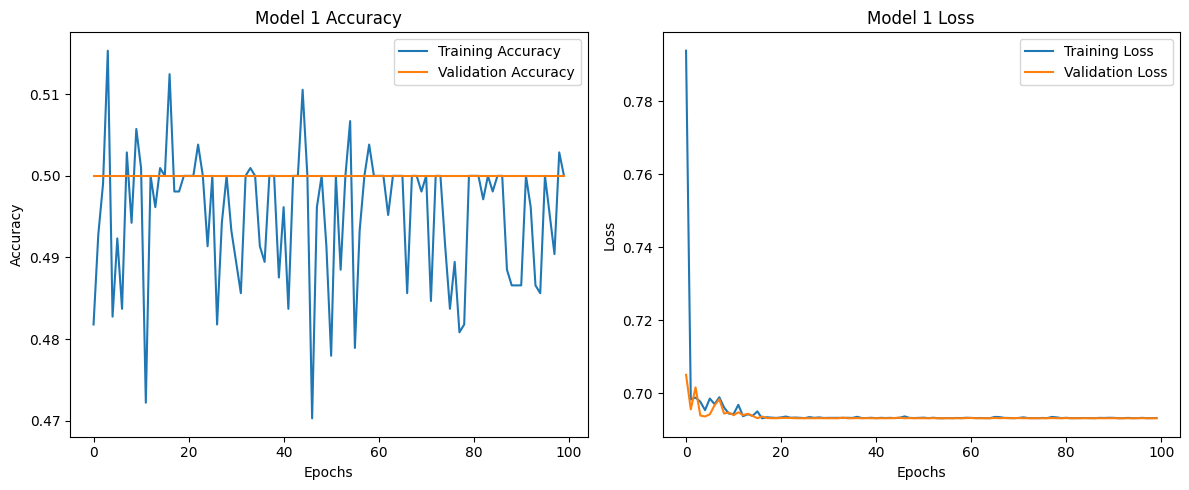

In [ ]:
# Plot the model's loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model 1 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions on the test set
y_pred_1 = (model1.predict(X_test_selected) > 0.5).astype("int32")

# Generate the confusion matrix
cm_1= confusion_matrix(y_test, y_pred_1)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_1, annot=True, cmap='viridis', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Model 1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Print classification report for additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_1))

In [ ]:
# Define a simple ANN model
model2 = Sequential([
    Dense(50, activation='relu', input_shape=(X_train_selected.shape[1],)),  # Input layer
    Dense(35, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (for binary classification)
])

# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model2.fit(X_train_selected, y_train, epochs=50, batch_size=10, validation_data=(X_test_selected, y_test))


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model2.evaluate(X_test_selected, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
# Plot the model's loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model 2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions on the test set
y_pred_2 = (model2.predict(X_test_selected) > 0.5).astype("int32")

# Generate the confusion matrix
cm_2= confusion_matrix(y_test, y_pred_1)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_2, annot=True, cmap='viridis', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Model 1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Print classification report for additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_2))

In [ ]:
# Define a simple ANN model
model3 = Sequential([
    Dense(50, activation='relu', input_shape=(X_train_selected.shape[1],)),  # Input layer
    Dense(35, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (for binary classification)
])

# Compile the model
model3.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model3.fit(X_train_selected, y_train, epochs=50, batch_size=10, validation_data=(X_test_selected, y_test))


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model3.evaluate(X_test_selected, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
# Plot the model's loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model 3 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions on the test set
y_pred_3 = (model3.predict(X_test_selected) > 0.5).astype("int32")

# Generate the confusion matrix
cm_3= confusion_matrix(y_test, y_pred_3)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_2, annot=True, cmap='viridis', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Model 3')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Print classification report for additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_3))

In [ ]:
# Define a simple ANN model
model4 = Sequential([
    Dense(50, activation='relu', input_shape=(X_train_selected.shape[1],)),  # Input layer
    Dense(35, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (for binary classification)
])

# Compile the model
model4.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model4.fit(X_train_selected, y_train, epochs=50, batch_size=30, validation_data=(X_test_selected, y_test))


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model4.evaluate(X_test_selected, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
# Plot the model's loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 4 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model 4 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions on the test set
y_pred_4 = (model4.predict(X_test_selected) > 0.5).astype("int32")

# Generate the confusion matrix
cm_4= confusion_matrix(y_test, y_pred_4)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_4, annot=True, cmap='viridis', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Model 3')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Print classification report for additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_4))

In [ ]:
# Define a simple ANN model
model5 = Sequential([
    Dense(50, activation='sigmoid', input_shape=(X_train_selected.shape[1],)),  # Input layer
    Dense(35, activation='sigmoid'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (for binary classification)
])

# Compile the model
model5.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model5.fit(X_train_selected, y_train, epochs=50, batch_size=30, validation_data=(X_test_selected, y_test))


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model5.evaluate(X_test_selected, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
# Plot the model's loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 5 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model 5 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions on the test set
y_pred_5 = (model5.predict(X_test_selected) > 0.5).astype("int32")

# Generate the confusion matrix
cm_5= confusion_matrix(y_test, y_pred_5)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_5, annot=True, cmap='viridis', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Model 5')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Print classification report for additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_5))